# S8 T01:Feature Engineering
Gestion de parámetros
___

### Exercice 1: Getting dummies of the categorical variables.
___

In [287]:
#Importing the librarys:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [288]:
#Print the first two rows:
df = pd.read_csv('Michael_Jordan_Data.csv')
df.head(2)

,EndYear,Rk,G,Date,Years,Days,Age,Tm,Home,Opp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1985,1,1,10/26/1984,21,252,21.689938,CHI,1,WSB,...,1,5,6,7,2,4,5,2,16,12.5
1,1985,2,2,10/27/1984,21,253,21.692676,CHI,0,MIL,...,3,2,5,5,2,1,3,4,21,19.4


In [289]:
#Show some info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EndYear  1072 non-null   int64  
 1   Rk       1072 non-null   int64  
 2   G        1072 non-null   int64  
 3   Date     1072 non-null   object 
 4   Years    1072 non-null   int64  
 5   Days     1072 non-null   int64  
 6   Age      1072 non-null   float64
 7   Tm       1072 non-null   object 
 8   Home     1072 non-null   int64  
 9   Opp      1072 non-null   object 
 10  Win      1072 non-null   int64  
 11  Diff     1072 non-null   int64  
 12  GS       1072 non-null   int64  
 13  MP       1072 non-null   int64  
 14  FG       1072 non-null   int64  
 15  FGA      1072 non-null   int64  
 16  FG_PCT   1072 non-null   float64
 17  3P       1072 non-null   int64  
 18  3PA      1072 non-null   int64  
 19  3P_PCT   742 non-null    float64
 20  FT       1072 non-null   int64  
 21  FTA      1072 

In [290]:
#Knowing for example that Opp column is a categorical variable, we will get the unique values of the column opponent to transform in dummies for handle the data better:
df['Opp'].unique()

array(['WSB', 'MIL', 'KCK', 'DEN', 'DET', 'NYK', 'IND', 'SAS', 'BOS',
       'PHI', 'SEA', 'POR', 'GSW', 'PHO', 'LAC', 'LAL', 'NJN', 'DAL',
       'HOU', 'ATL', 'CLE', 'UTA', 'SAC', 'MIA', 'CHH', 'MIN', 'ORL',
       'TOR', 'VAN', 'WAS', 'MEM', 'CHI', 'NOH'], dtype=object)

In [291]:
#Assing a variable df_dmm that will be cointain our dummies:
df_dumm = pd.get_dummies(df, columns=['Opp'], prefix= "dmmi" )
df_dumm.head()

,EndYear,Rk,G,Date,Years,Days,Age,Tm,Home,Win,...,dmmi_PHO,dmmi_POR,dmmi_SAC,dmmi_SAS,dmmi_SEA,dmmi_TOR,dmmi_UTA,dmmi_VAN,dmmi_WAS,dmmi_WSB
0,1985,1,1,10/26/1984,21,252,21.689938,CHI,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1985,2,2,10/27/1984,21,253,21.692676,CHI,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985,3,3,10/29/1984,21,255,21.698152,CHI,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1985,4,4,10/30/1984,21,256,21.700890,CHI,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1985,5,5,11/1/1984,21,258,21.706366,CHI,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Basically what the function will do is create a column for each different value of each cell, separating them by the character that we specify, and fill that column with zeros and ones.

### Exercice 1 Part 2: Standarized the numerical variables:
___

In [292]:
#Grab the column Puntos, and take the mean:
df_puntos_mean= df['PTS'].mean()
df_puntos_mean

30.12313432835821

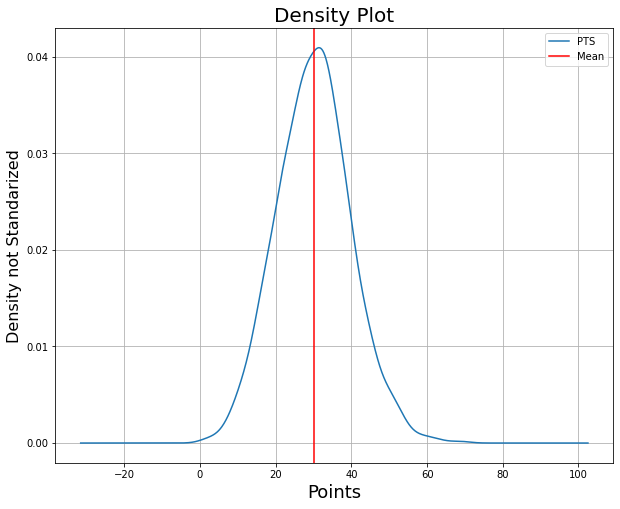

In [293]:
plt.figure(figsize=(10,8))
df['PTS'].plot.kde()
plt.title("Density Plot",  fontsize=20)
plt.xlabel("Points", fontsize=18)
plt.ylabel("Density not Standarized", fontsize=16)
plt.grid()
plt.axvline(x=df_puntos_mean, color='red', label='Mean')
plt.legend()
plt.show()

#### As we can see the mean is 30 points

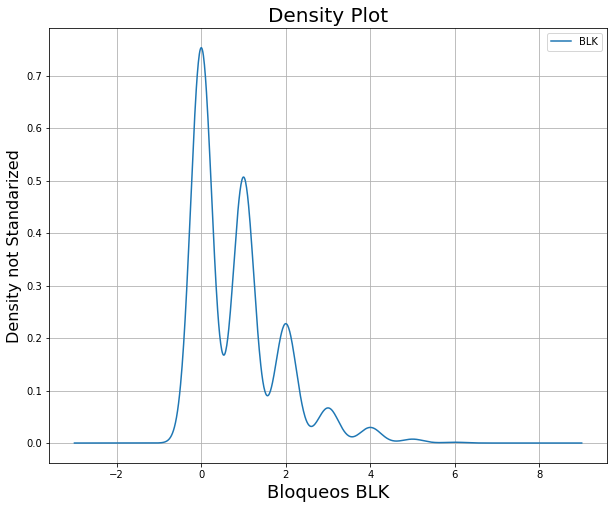

In [294]:
plt.figure(figsize=(10,8))
df['BLK'].plot.kde()
plt.title("Density Plot",  fontsize=20)
plt.xlabel("Bloqueos BLK", fontsize=18)
plt.ylabel("Density not Standarized", fontsize=16)
plt.grid()

plt.legend()
plt.show()

In [319]:
#Assing to df2 just the columns that we will work with:
df2 = df[['PTS','AST', 'BLK']]

In [296]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PTS     1072 non-null   int64
 1   AST     1072 non-null   int64
 2   BLK     1072 non-null   int64
dtypes: int64(3)
memory usage: 25.2 KB


### We use Standar Scaler to transform our variables and set the mean to 0 and the standard deviation to 1 to have a better scale.

In [297]:
#Import the library and standarized the variables PTS, AST, BLK(Puntos, Asistencias, Bloqueos)
from sklearn.preprocessing import StandardScaler
data = df2
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data['PTS'] = data[0]
data['AST'] = data[1]
data['BLK'] = data[2]
data= data[['PTS', 'AST','BLK']]
data.head()


,PTS,AST,BLK
0,-1.448905,0.641328,3.133382
1,-0.935951,-0.093577,0.165206
2,0.705504,-0.093577,1.154598
3,-0.525587,-0.093577,0.165206
4,-1.346314,-0.093577,0.165206


In [298]:
data_mean_pts = data['PTS'].mean()
data_mean_ast = data['AST'].mean()
data_mean_blk = data['BLK'].mean()

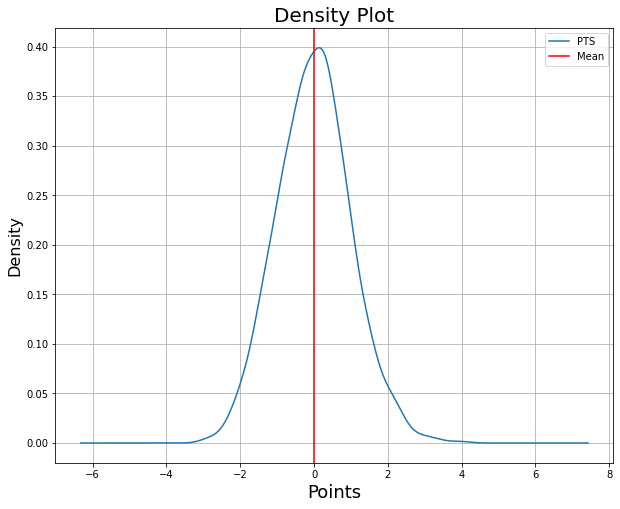

In [299]:
plt.figure(figsize=(10,8))
data['PTS'].plot.kde()
plt.title("Density Plot",  fontsize=20)
plt.xlabel("Points", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()
plt.axvline(x=data_mean_pts, color='red', label='Mean') #show the mean line()
plt.legend()
plt.show()

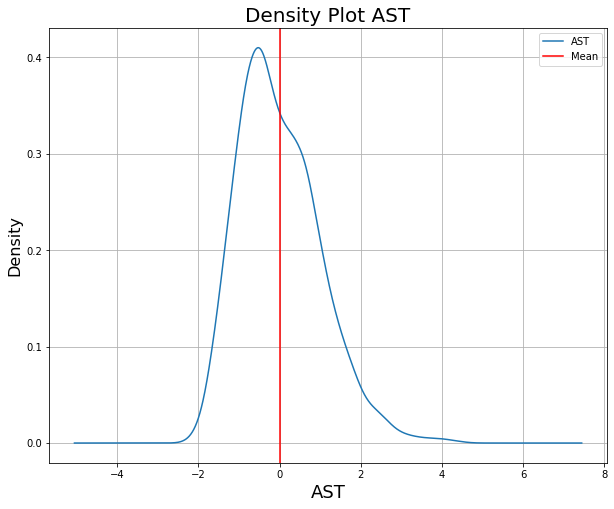

In [300]:
plt.figure(figsize=(10,8))
data['AST'].plot.kde()
plt.title("Density Plot AST",  fontsize=20)
plt.xlabel("AST", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()

plt.axvline(x=data_mean_ast, color='red', label='Mean') #Show the mean line
plt.legend()
plt.show()

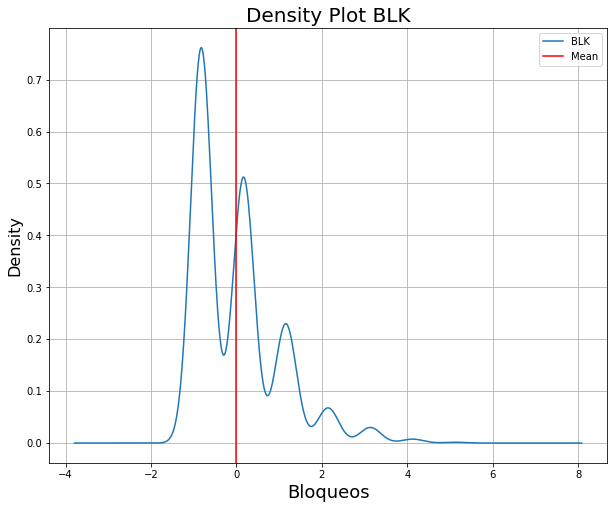

In [301]:
plt.figure(figsize=(10,8))
data['BLK'].plot.kde()
plt.title("Density Plot BLK",  fontsize=20)
plt.xlabel("Bloqueos", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()

plt.axvline(x=data_mean_blk, color='red', label='Mean')
plt.legend()
plt.show()

<Figure size 720x576 with 0 Axes>

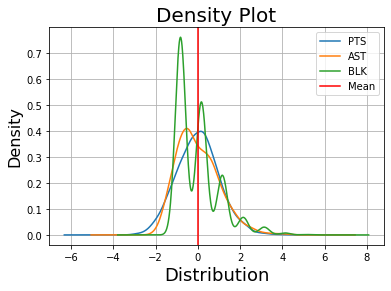

In [302]:
plt.figure(figsize=(10,8))
data.plot.kde()
plt.title("Density Plot",  fontsize=20)
plt.xlabel("Distribution", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()

plt.axvline(x=0, color='red', label='Mean')
plt.legend()
plt.show()

___

## Exercice 2: Apply a principal component analysis or PCA


### The principal component analysis it is used to group many variables that are correlated with each other and transform it into 1 or 2 variables that contain the same information to reduce the size of the initial dataset.
### Normally, it is sought to obtain a result between 90-95% variance.

In [303]:
#Import our librarys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [304]:
#Assign to the variable "x_col" all the numerics variables of our data to compile in just 2 variables:
x_col = df[['Rk','Age', 'PTS','AST', 'BLK', 'GmSc']] 

In [305]:
#First standarized our data x_column with Standar Scaler:
ss = StandardScaler()
x_col=ss.fit_transform(x_col)
x_col = pd.DataFrame({'Ranking': x_col[:,0], 'Edad':x_col[:,1], 'Puntos':x_col[:,2], 'Asistencias':x_col[:,3], 'Bloqueos':x_col[:,4], 'GameScore':x_col[:,5]})
x_col

,Ranking,Edad,Puntos,Asistencias,Bloqueos,GameScore
0,-1.631948,-1.520719,-1.448905,0.641328,3.133382,-1.153781
1,-1.589641,-1.520208,-0.935951,-0.093577,0.165206,-0.426140
2,-1.547333,-1.519185,0.705504,-0.093577,1.154598,0.997506
3,-1.505026,-1.518673,-0.525587,-0.093577,0.165206,-0.921779
4,-1.462719,-1.517650,-1.346314,-0.093577,0.165206,-1.079962
...,...,...,...,...,...,...
1067,1.625712,1.926029,-0.935951,-1.563388,-0.824186,-0.763596
1068,1.668020,1.927052,-0.525587,-0.461030,-0.824186,-0.869052
1069,1.710327,1.927563,-1.346314,0.273876,0.165206,-0.942870
1070,1.752634,1.928586,-0.935951,-1.563388,-0.824186,-1.280327


In [306]:
#Transform all the variables in 2 variables:
pca2 = PCA(n_components=2, random_state=42)
pca_2= pca2.fit_transform(x_col)
pca_2

array([[-0.02120385,  4.07094548],
       [-0.24981989,  1.94946718],
       [ 1.82556741,  1.60684466],
       ...,
       [-1.91652622, -0.90514191],
       [-2.56366567, -2.05970609],
       [-2.84684497, -1.49439428]])

In [315]:
#Create a dataframe with the name df3 that will contain PCA1, PCA2 column:
df3 = pd.DataFrame({'PCA1': pca_2[:,0], 'PCA2':pca_2[:,1]})
df3

,PCA1,PCA2
0,-0.021204,4.070945
1,-0.249820,1.949467
2,1.825567,1.606845
3,-0.314756,1.866805
4,-0.875179,2.143897
...,...,...
1067,-2.255364,-2.090685
1068,-1.839546,-1.902131
1069,-1.916526,-0.905142
1070,-2.563666,-2.059706


In [308]:
#Ratio:
pca2.explained_variance_ratio_

array([0.38213971, 0.17800674])

In [309]:
pca2.explained_variance_ratio_.sum()

0.5601464431928321

In [310]:
#Add to the dataframe df3 the column opponent:
df3 = pd.DataFrame({'PCA1': pca_2[:,0], 'PCA2':pca_2[:,1], 'Opp':df['Opp']})
df3

,PCA1,PCA2,Opp
0,-0.021204,4.070945,WSB
1,-0.249820,1.949467,MIL
2,1.825567,1.606845,MIL
3,-0.314756,1.866805,KCK
4,-0.875179,2.143897,DEN
...,...,...,...
1067,-2.255364,-2.090685,BOS
1068,-1.839546,-1.902131,MIA
1069,-1.916526,-0.905142,ATL
1070,-2.563666,-2.059706,NYK


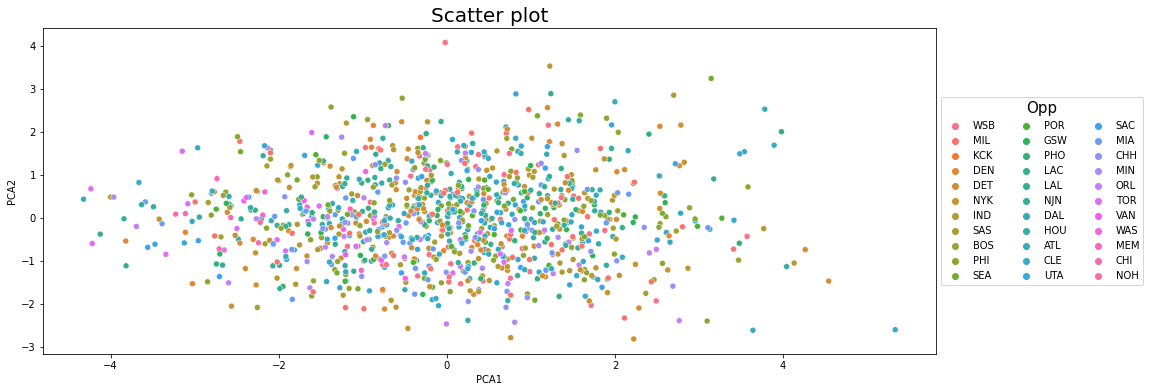

In [311]:
#Lets plot a Scatter chart:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Opp', data= df3)
plt.legend(title='Opp',ncol= 3,title_fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Scatter plot', fontsize=20)
plt.show()

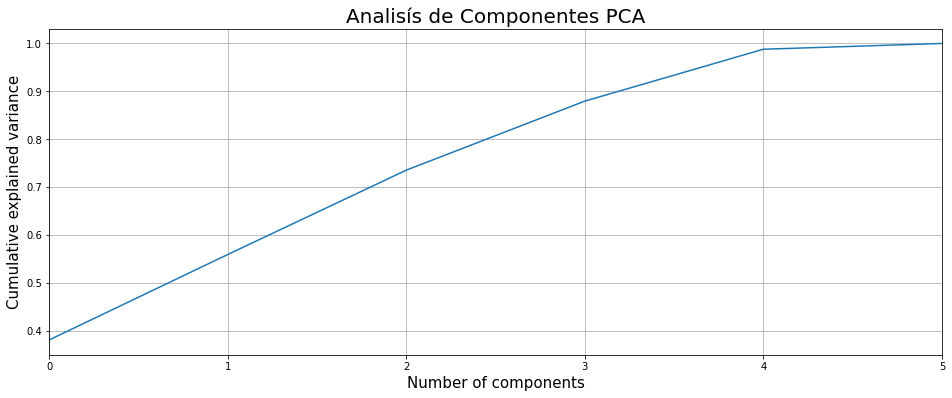

In [312]:
#Lets plot the PCA:
pca = PCA().fit(x_col)
plt.figure(figsize=(16, 6))
plt.title('Analisís de Componentes PCA', size=20)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1) #Limit the x with the numbers of our components
plt.xlabel('Number of components',size=15)
plt.ylabel('Cumulative explained variance', size=15)
plt.grid()
plt.show()

As we can see our 5 components are above 90-95% of variance wich is really good and mean that our components or variables are highly correlated.

## Exercice 3: Normalizing the Data

___

### The Normalizer convert our variables in positive numbers, inclusive if our variables have negative values:

In [313]:
#Import the librarys and use Normalizer()
from sklearn import preprocessing
datos_normalizados= preprocessing.Normalizer().transform(df2.T)
datos_normalizados = datos_normalizados.T
datos_normalizados = pd.DataFrame({'Puntos': datos_normalizados[:,0], 'Asistencias':datos_normalizados[:,1], 'Bloqueos':datos_normalizados[:,2]})
datos_normalizados

,Puntos,Asistencias,Bloqueos
0,0.015435,0.036129,0.093276
1,0.020258,0.025806,0.023319
2,0.035693,0.025806,0.046638
3,0.024117,0.025806,0.023319
4,0.016399,0.025806,0.023319
...,...,...,...
1067,0.020258,0.005161,0.000000
1068,0.024117,0.020645,0.000000
1069,0.016399,0.030968,0.023319
1070,0.020258,0.005161,0.000000


<Figure size 720x576 with 0 Axes>

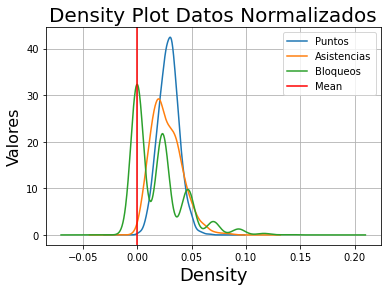

In [320]:
#Plotting our normalized data:
plt.figure(figsize=(10,8))
datos_normalizados.plot.kde()
plt.title("Density Plot Datos Normalizados",  fontsize=20)
plt.xlabel("Density", fontsize=18)
plt.ylabel("Valores", fontsize=16)

plt.grid()
plt.axvline(x=0, color='red', label='Mean')
plt.legend()
plt.show()

___